In [154]:
pip install opencv-python

In [155]:
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
import zipfile
import matplotlib.pyplot as plt

In [156]:
%tensorflow_version 2.x

In [157]:
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
tensorflow.__version__

'2.3.0'

In [158]:
cascade_faces = "/content/drive/My Drive/DataScience/Reconhecimento_Emocoes/Material/haarcascade_frontalface_default.xml"

In [159]:
caminho_modelo = "/content/drive/My Drive/DataScience/Reconhecimento_Emocoes/Material/modelo_01_expressoes.h5"

In [160]:
face_detection = cv2.CascadeClassifier(cascade_faces)

In [161]:
classificador_emocoes = load_model(caminho_modelo, compile=False)

In [162]:
expressoes = ["Raiva", "Nojo", "Medo", "Feliz", "Triste", "Surpreso", "Neutro"]

In [163]:
himym = cv2.imread("drive/My Drive/DataScience/Reconhecimento_Emocoes/Material/testes/teste05.jpg")

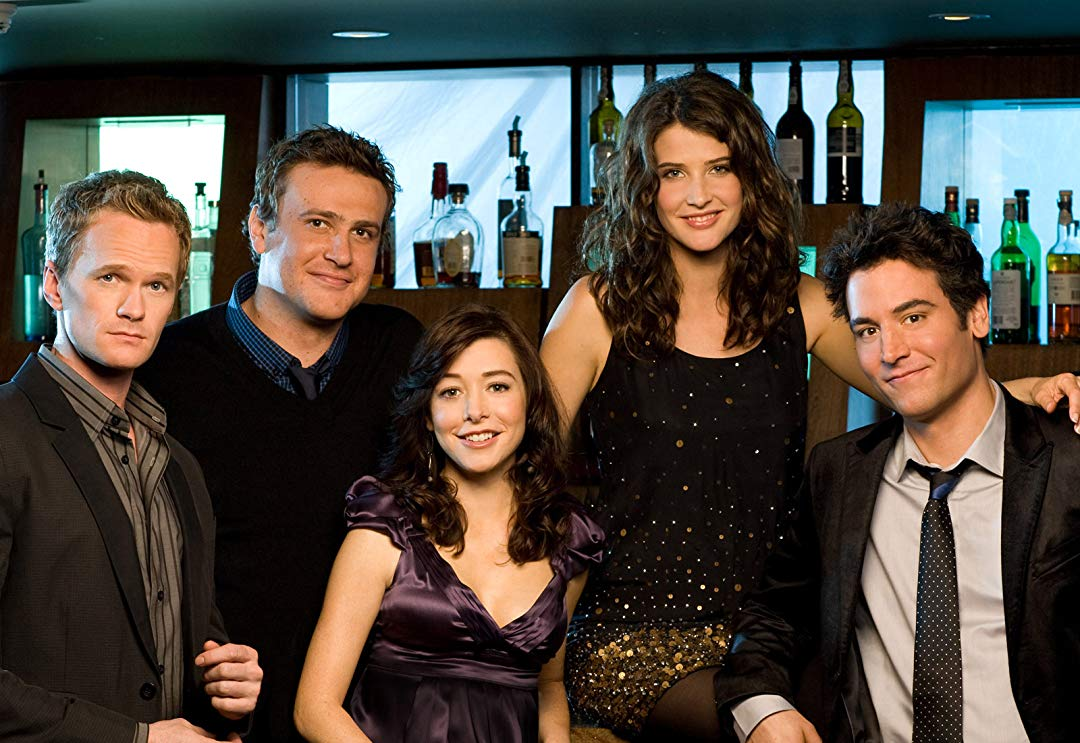

In [164]:
cv2_imshow(himym)

In [165]:
himym.shape

(743, 1080, 3)

In [166]:
faces_2 = face_detection.detectMultiScale(himym, scaleFactor = 1.2,
                                        minNeighbors = 5, minSize = (20,20))

In [167]:
faces_2

array([[641, 132, 110, 110],
       [261, 173, 137, 137],
       [ 72, 233, 123, 123],
       [826, 265, 138, 138],
       [416, 343, 120, 120]], dtype=int32)

In [168]:
faces_2.shape

(5, 4)

In [169]:
len(faces_2)

5

In [170]:
cinza_2 = cv2.cvtColor(himym, cv2.COLOR_BGR2GRAY)

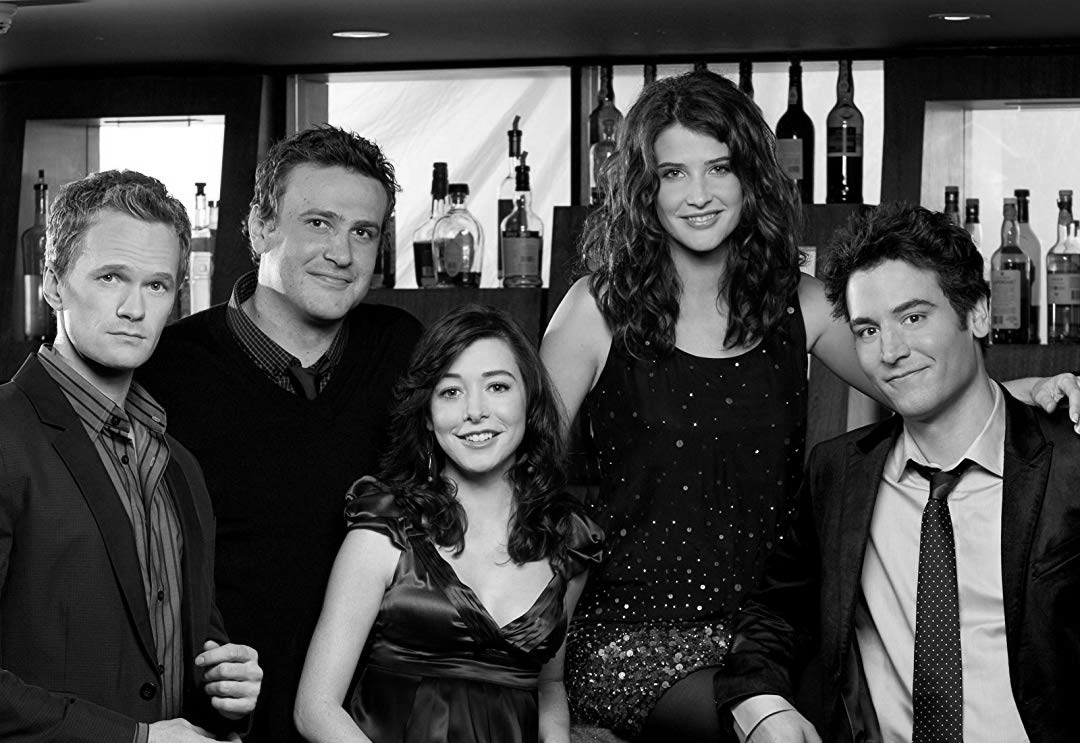

In [171]:
cv2_imshow(cinza_2)

In [172]:
cinza_2.shape

(743, 1080)

In [173]:
original_2 = himym.copy()

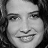

[2.7702579e-06 3.5412676e-10 2.4622364e-06 9.9773443e-01 4.7156313e-06
 4.2669512e-06 2.2513096e-03]
0.9977344
3


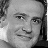

[5.2530060e-05 2.9282321e-08 2.5201483e-05 9.8186457e-01 5.3480780e-05
 2.2944221e-05 1.7981274e-02]
0.9818646
3


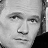

[0.19628562 0.01027166 0.16341534 0.03135768 0.2690524  0.01932402
 0.31029338]
0.31029338
6


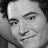

[3.5893849e-10 9.6986457e-17 4.9052373e-10 9.9999940e-01 7.8425999e-10
 5.0063464e-10 6.4222252e-07]
0.9999994
3


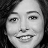

[2.0988256e-05 9.2521191e-09 2.2193655e-05 9.8804224e-01 3.0619765e-05
 4.5486770e-05 1.1838501e-02]
0.98804224
3


In [174]:
for (x, y, w, h) in faces_2:
  roi_2 = cinza_2[y:y + h, x:x + w]

  roi_2 = cv2.resize(roi_2, (48, 48))

  cv2_imshow(roi_2)

  roi_2 = roi_2.astype("float") / 255
  roi_2 = img_to_array(roi_2)
  roi_2 = np.expand_dims(roi_2, axis = 0)

  preds_2 = classificador_emocoes.predict(roi_2)[0]
  print(preds_2)

  emotion_prob_2 = np.max(preds_2)
  print(emotion_prob_2)

  print(preds_2.argmax())
  label_2 = expressoes[preds_2.argmax()]

  cv2.putText(original_2, label_2, (x,y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255,0,0), 2, cv2.LINE_AA)

  cv2.rectangle(original_2, (x, y), (x + w, y + h), (255,0,0), 2)

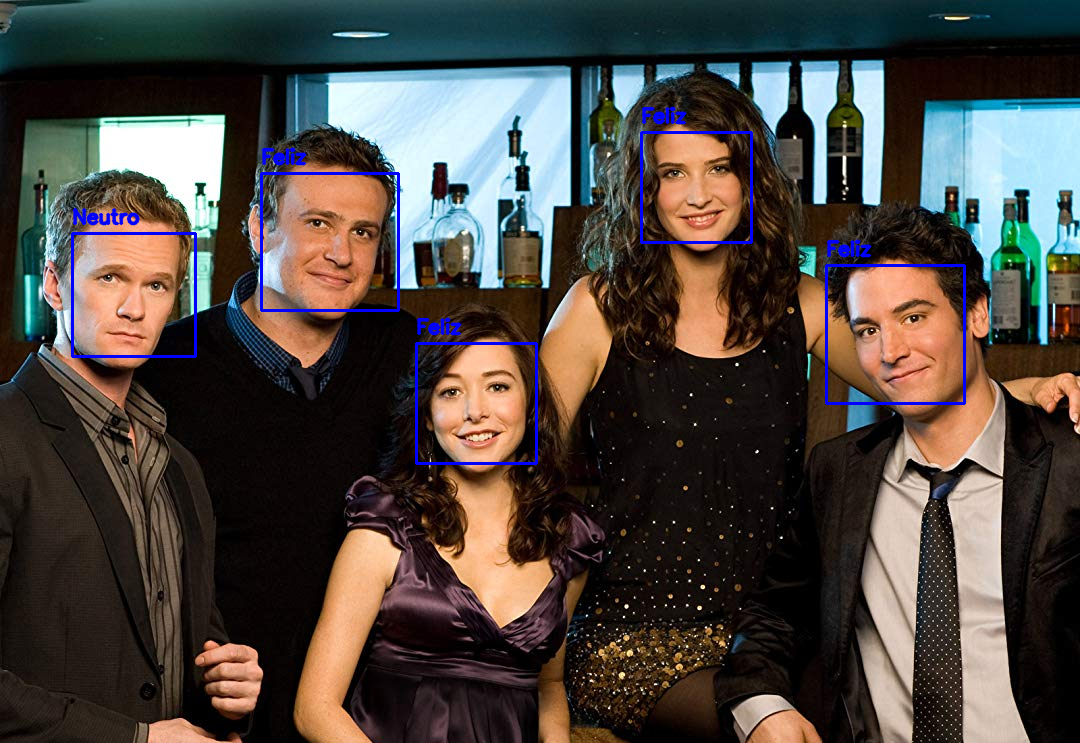

In [175]:
cv2_imshow(original_2)